# Lasso, Ridge and Elastic Net regression

### Datset infromation

#### Algerian Forest Fires Dataset

The dataset includes 244 instances that regroup a data of two regions of ALgeria, namely the Bejaia region located in the norteast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria. 

122 instances for each region.

The period from June 2012 to Septermber 2012. The datset includes attributes and 1 output attribute (class). The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

**Link:** https://archive.ics.uci.edu/dataset/547/algerian+forest+fires+dataset

#### Variable Information
1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations 
2. Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90 
4. Ws :Wind speed in km/h: 6 to 29 
5. Rain: total day in mm: 0 to 16.8

**FWI Components**

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
8. Drought Code (DC) index from the FWI system:  7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely   fire and not fire

#### Data creator

Faroudja Abid

fabid@cdta.dz

Center for Development of Advanced Technologies (CDTA)

So main task it to know what Fire weather index (FWI) and Classes whether fire is goint to happen or not.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
%matplotlib inline 

In [17]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)

it will load first region data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


so all the data is object type. SO we need to do some data engineering. For example converting the datatype, finding the missing values and infinties etc. 

In [19]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [20]:
# Now let's see the location where data is missing:

df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


If we notice, it shows the data is missing on row 122, which is basically represening the data of different region. Since our data for the two regions are given in the datafile, we need to convert them two two different datsets. 

Now the dataset is converted into two sets based on region from 122th index, we can make a new column based on the region.
1. "Bejaia Region Datset"
2. "Sidi-Bel Abbes Region dataset"

add new column with region

Here we will lebel to first region to 0 and second region to 1.

In [21]:
# Identify the rows where the header for each region is located
bejaia_header_row = 0
sidi_bel_abbes_header_row = 122

In [22]:
# Extract data for the Bejaia region
bejaia_data = df.iloc[bejaia_header_row :sidi_bel_abbes_header_row].copy()

# Extract data for the Sidi-Bel Abbes region
sidi_bel_abbes_data = df.iloc[sidi_bel_abbes_header_row:].copy()

# Add a new column 'Region' with values 0 for the Bejaia region and 1 for the Sidi-Bel Abbes region
bejaia_data['Region'] = 0
sidi_bel_abbes_data['Region'] = 1

In [24]:
# Concatenate the two DataFrames back together
final_df = pd.concat([bejaia_data, sidi_bel_abbes_data])

# Reset the index of the final DataFrame
final_df.reset_index(drop=True, inplace=True)

In [25]:
final_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [26]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


so we see that the Region is float type. But I dont want to save much memory for the float values for the region attribute. We can do it by converting the data type to intiger.

In [27]:
final_df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [28]:
final_df = final_df.dropna().reset_index(drop=True)

In [29]:
final_df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [30]:
final_df.iloc[115:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
115,24,09,2012,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7,not fire,0
116,25,09,2012,26,81,21,5.8,48.6,3,7.7,0.4,3,0.1,not fire,0
117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire,0
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire,0
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1
123,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
124,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1


Now we see that we have still the 120 row with the header names for the second region

In [31]:
final_df = final_df.drop(122).reset_index(drop =True)

In [32]:
final_df.iloc[115:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
115,24,09,2012,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7,not fire,0
116,25,09,2012,26,81,21,5.8,48.6,3,7.7,0.4,3,0.1,not fire,0
117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire,0
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire,0
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1


In [33]:
final_df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [34]:
## fix spaces in columns names
final_df.columns = final_df.columns.str.strip()
final_df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [35]:
final_df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int64
dtype: object

### changes the required columns as integer type

In [36]:
final_df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = final_df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [37]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int32(6), int64(1), object(8)
memory usage: 22.9+ KB


## changing the other columns to float data type

In [38]:
#final_df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI',]]
objects = [features for features in final_df.columns if final_df[features].dtypes == 'O']

In [39]:
for i in objects:
    if i!='Classes':
        final_df[i] = final_df[i].astype(float)

In [40]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int32(6), int64(1), object(1)
memory usage: 22.9+ KB


In [41]:
final_df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [42]:
final_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [43]:
final_df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [45]:
## let save the cleaned dataset
final_df.to_csv('Algerian_forst_fires_cleaned_dataset.csv', index=False)

## Exploretory data analysis

In [46]:
# Dropping unrequired columns
df_copy = final_df.drop(['day', 'month', 'year'], axis=1)

In [47]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [48]:
## categories in 'Classes'
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

so we see that there are some spaces or something not correct with the class names

In [50]:
## Encoding of the catgeories in classes
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'), 0,1)

In [51]:
## categories in 'Classes'
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [52]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


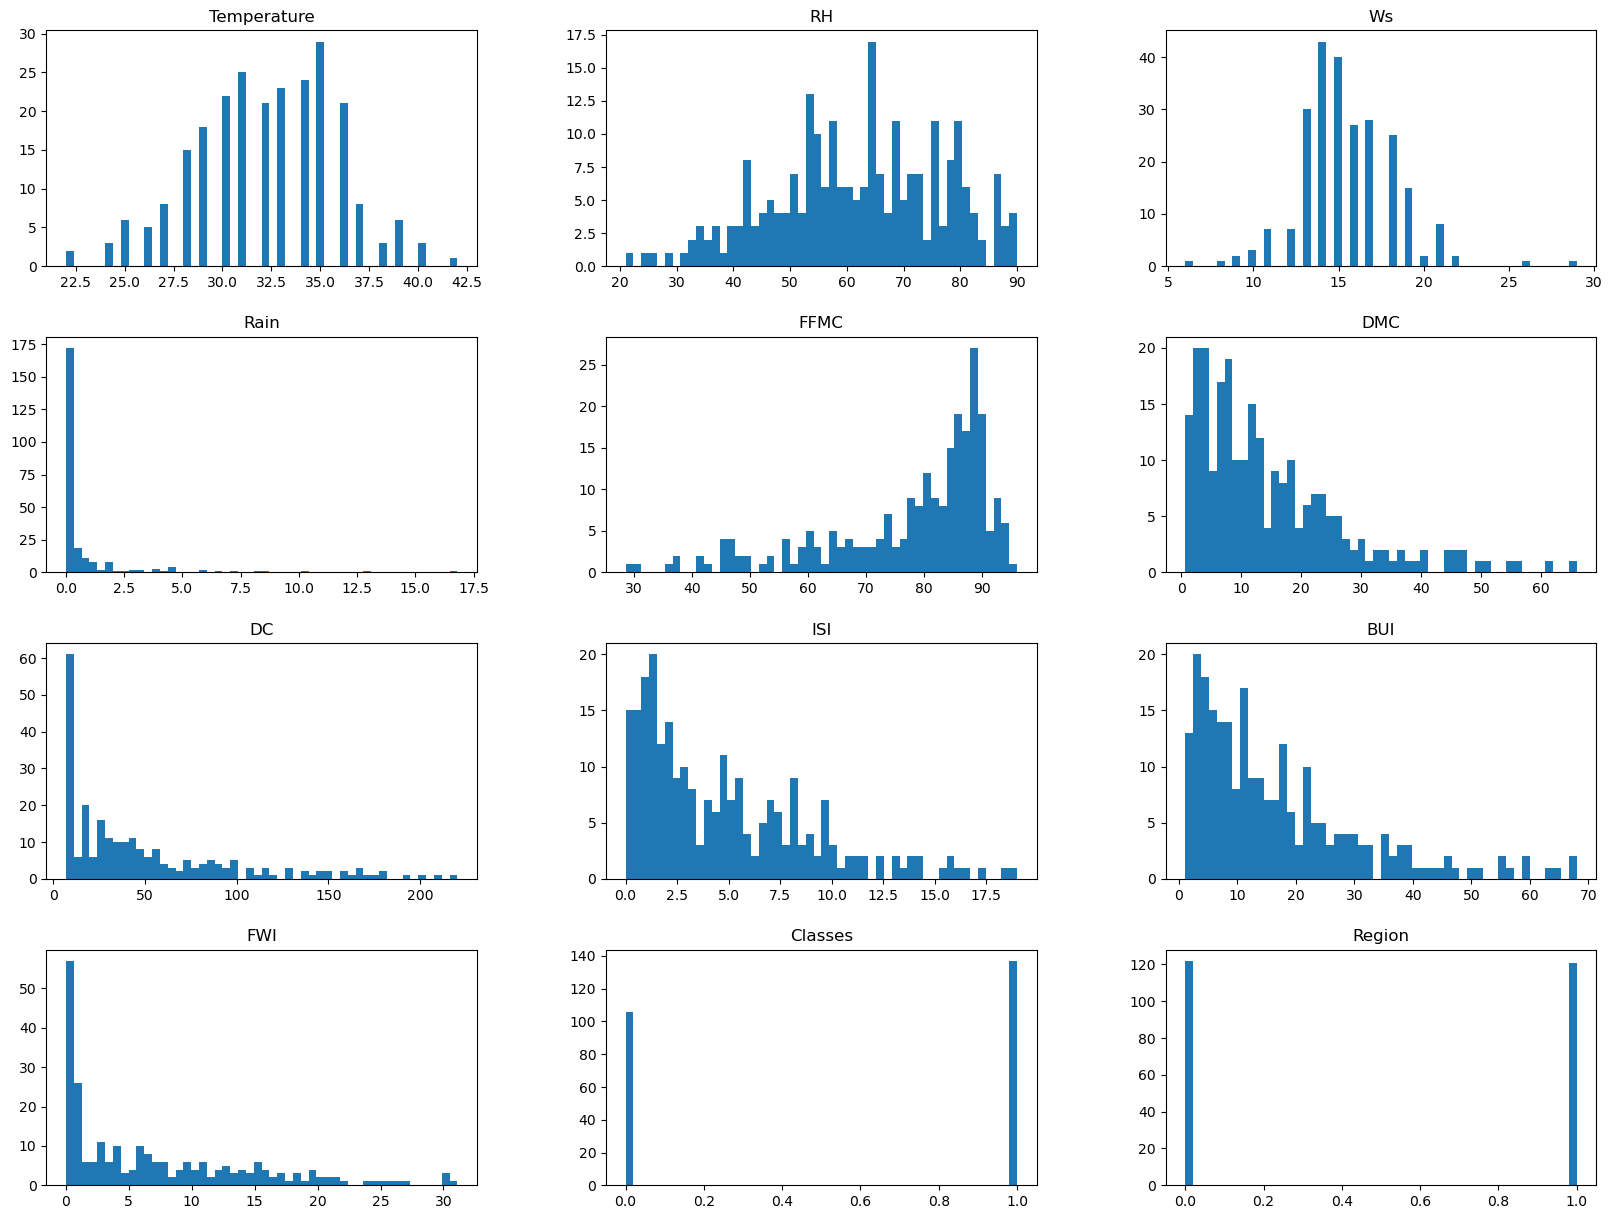

In [54]:
## Density plot for all features
df_copy.hist(bins=50, figsize=(20,15), grid=False)

plt.show()